# Useful functions

In [1]:
import numpy as np
import pandas as pd 
import keras
import os
import re
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing, model_selection
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn import datasets
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist

Using TensorFlow backend.
/home/cawosh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cawosh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cawosh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cawosh/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
def get_goodXy (X,y):
    ynew = model.predict_classes(X)
    X_good =[]
    y_good=[]
    for i in range(len(X)):
        if (ynew[i]==0 and y[i]==1) or (ynew[i]==1 and y[i]==0):
            print ("error prediction for X=%s, Predicted=%s, Real=%s"% (X[i], ynew[i], y[i]))
        else :
            X_good.append(X[i])
            y_good.append(y[i])
    return X_good,y_good        

In [3]:
def get_result_layers(model,X):
    result_layers=[]
    for i in range (len(model.layers)-1):
        hidden_layers= keras.backend.function(
                [model.layers[0].input],   
                [model.layers[i].output,] 
                )    
        result_layers.append(hidden_layers([X])[0])  
    return result_layers

In [4]:
def save_result_layers(filename,X,y,result_layers):
    f = open(filename, "w")
    for nb_X in range (len(X)):
        #my_string=""
        my_string=str(y[nb_X])+','
        for nb_layers in range (len(model.layers)-1):
            my_string+="<b>,"
            for j in range (len(result_layers[nb_layers][nb_X])):
                my_string+=str(result_layers[nb_layers][nb_X][j])+','
            my_string+="</b>,"    
        my_string=my_string [0:-1]
        my_string+='\n'
        f.write(my_string)    
    f.close()

## Iris dataset 

In [5]:
url="./iris.csv"
names = ['SepalLengthCm', 'SepalWidthCm', 
         'PetalLengthCm', 'PetalWidthCm', 
         'Species']

data = pd.read_csv(url, names=names)

#Classification binaire sur Virginica et Setosa seulement
data=data[data['Species'].isin(['Iris-virginica', 'Iris-setosa'])]

i = 8
data_to_predict = data[:i].reset_index(drop = True) 
"""
reset_index() is a method to reset index of a Data Frame. 
reset_index() method sets a list of integer ranging from 0 to length of data as index. 
"""
predict_species = data_to_predict.Species 
""" Species de la class Iris """

predict_species = np.array(predict_species) 
"""
An array object satisfying the specified requirements.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html
"""

prediction = np.array(data_to_predict.drop(['Species'],axis= 1))

data = data[i:].reset_index(drop = True)

X = data.drop(['Species'], axis = 1) 
"""
The drop() function is used to drop specified labels from rows or columns.
"""
X = np.array(X)
y = data['Species']

encoder = LabelEncoder()
y=encoder.fit_transform(y)


train_X, test_X, train_y, test_y = model_selection.train_test_split(X,y,test_size = 0.1, random_state = 0) 

In [6]:
# Utilisation de keras comme classifieur
# mettre sigmoid comme fonction car binaire. Attention 1 seul neurone en sortie
input_dim = len(data.columns) - 1
model = Sequential()
model.add(Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_X, train_y, epochs = 10, batch_size = 2)

scores = model.evaluate(test_X, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
82/82 [==============================] - 1s 6ms/step - loss: 0.6657 - acc: 0.5610
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.5391 - acc: 0.5610
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.4435 - acc: 0.5610
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.3803 - acc: 0.5976
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.3385 - acc: 0.9024
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.3143 - acc: 0.9878
Epoch 7/10
82/82 [==============================] - 0s 871us/step - loss: 0.2995 - acc: 0.9878
Epoch 8/10
82/82 [==============================] - 0s 1ms/step - loss: 0.2873 - acc: 0.9878
Epoch 9/10
82/82 [==============================] - 0s 915us/step - loss: 0.2780 - acc: 0.9878
Epoch 10/10
10/10 [==============================] - 0s 5ms/step

acc: 90.00%


In [7]:
# Récupération seulement des bons classés
X_good,y_good=get_goodXy (train_X, train_y)

In [8]:
# Récupération des valeurs de tous les layers sauf le dernier
result_layers=get_result_layers(model,X_good)

In [9]:
# Sauvegarde du fichier
# structure :
# 0/1 = valeur de la classe
# chaque valeur de layer est entourée par un []
save_result_layers("iris_8_10_8_tmp",X_good,y_good,result_layers)
# tri du fichier
os.system ('sort iris_8_10_8_tmp > iris_8_10_8_.csv')
# effacer le fichier intermédiaire
os.system ('rm iris_8_10_8_tmp')

0

In [10]:
def get_directory_layers_from_csv(filename):
    tokens=filename.split("_")
    df = pd.read_csv(filename, sep = ',', header = None) 

    
    # creation d'un répertoire pour sauver tous les fichiers
    repertoire=filename[0:-4]
    os.makedirs(repertoire, exist_ok=True)
    string = repertoire+'/'+tokens[0]+'_'
    f=[]
    filenames=[]
    for nb_tokens in range (1,len(tokens)-1):
        name_file=string+'l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'.csv'
        f.append(open(name_file, "w"))
        filenames.append(name_file)
        
        
    # sauvegarde du dataframe dans une chaîne de caracteres
    ch = df.to_string(header=False,
                  index=False,
                  index_names=False).split('\n')
    vals = [','.join(ele.split()) for ele in ch]
    
    # sauvegarde dans des fichiers spécifiques par layer
    token_layer=[]
    token_exemples=[]
    for nb_exemples in range (len(vals)):
        deb=str(df[0][nb_exemples])+','
        # 1 ligne correspond à une chaine
        s=vals[nb_exemples]
        listoftokens=re.findall(r'<b>,(.+?),</b>', s)
        nb_layers=len(listoftokens)
        
        for nb_token in range (nb_layers):
            save_token=''
            save_token=deb+str(listoftokens[nb_token])+'\n'
            
            f[nb_token].write(save_token)

    # sauvegarde d'un fichier qui contient tous les layers en une fois
    # récupération des données pour enlever les <b> et </b>
    df_all=pd.DataFrame()
    myindex=0
    for nb_columns in range(df.shape[1]):
        df[nb_columns]=df[nb_columns].astype(str)
        if (df[nb_columns]!='<b>').all() and (df[nb_columns]!='</b>').all():
            df_all[myindex]=df[nb_columns]
            myindex+=1

    # construction du nom du fichier de sauvegarde
    string = repertoire+'/'+tokens[0]+'_'
    for nb_tokens in range (1,len(tokens)-1):
        string+='l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'_'
    string+='.csv'       
    # sauvegarde en .csv
    df_all.to_csv(string, sep=',', encoding='utf-8',index=False)

In [11]:
from sklearn.decomposition import PCA
from numpy import ndarray
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import math

def plot_clusters_3D (X,y_predict, nb_clusters, pca_done=False):
    if pca_done==False:
        pca = PCA(n_components=3) 
        pca.fit(X) 
        pca_data = pd.DataFrame(pca.transform(X))
    else: pca_data = pd.DataFrame(X)
    colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
    # number of steps to taken generate n(clusters) colors
    skips = math.floor(len(colors[5 : -5])/nb_clusters) 
    cluster_colors = colors[5 : -5 : skips] 
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection = '3d') 
    ax.scatter(pca_data[0], pca_data[1], pca_data[2],
           c = list(map(lambda label : cluster_colors[label], 
                                            y_predict))) 

    str_labels = list(map(lambda label:'% s' % label, y_predict)) 

    list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 

    plt.show()
    
def plot_clusters_2D (X,y_predict, nb_clusters, pca_done=False):
    if pca_done==False:
        pca = PCA(n_components=2) 
        X_r = pca.fit(X).transform(X)
    else: X_r = X
    data = pd.DataFrame(X_r, columns=['x','y'])
    data['label']=y_predict
    list_clusters=list(set(y_predict))
    print (list_clusters)
    #create a new figure
    plt.figure(figsize=(5,5))

    #loop through labels and plot each cluster
    for i, label in enumerate(list_clusters):

        #add data points 
        plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=color[i], 
                alpha=0.20)

        #add label
        plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=color[i])
        
def get_directory_layers_from_csv(filename,destination):
    tokens=filename.split("_")
    print(tokens)
    tokens[0]=tokens[0].split("/")[len(tokens[0].split("/"))-1]
    df = pd.read_csv(filename, sep = ',', header = None) 

    
    # creation d'un répertoire pour sauver tous les fichiers
    repertoire=filename[0:-4]
    print(repertoire)
    os.makedirs(repertoire, exist_ok=True)
    string = destination+"/"+repertoire+'/'+tokens[0]+'_'
    f=[]
    filenames=[]
    for nb_tokens in range (1,len(tokens)-1):
        name_file=string+'l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'.csv'
        print(name_file)
        f.append(open(name_file, "w"))
        filenames.append(name_file)
        
        
    # sauvegarde du dataframe dans une chaîne de caracteres
    ch = df.to_string(header=False,
                  index=False,
                  index_names=False).split('\n')
    vals = [','.join(ele.split()) for ele in ch]
    
    # sauvegarde dans des fichiers spécifiques par layer
    token_layer=[]
    token_exemples=[]
    for nb_exemples in range (len(vals)):
        deb=str(df[0][nb_exemples])+','
        # 1 ligne correspond à une chaine
        s=vals[nb_exemples]
        listoftokens=re.findall(r'<b>,(.+?),</b>', s)
        nb_layers=len(listoftokens)
        
        for nb_token in range (nb_layers):
            save_token=''
            save_token=deb+str(listoftokens[nb_token])+'\n'
            
            f[nb_token].write(save_token)

    # sauvegarde d'un fichier qui contient tous les layers en une fois
    # récupération des données pour enlever les <b> et </b>
    df_all=pd.DataFrame()
    myindex=0
    for nb_columns in range(df.shape[1]):
        df[nb_columns]=df[nb_columns].astype(str)
        if (df[nb_columns]!='<b>').all() and (df[nb_columns]!='</b>').all():
            df_all[myindex]=df[nb_columns]
            myindex+=1


    # sauvegarde en .csv
    df_all.to_csv(string, sep=',', encoding='utf-8',index=False)

In [12]:
#Create a directory with a specific file for all the layers
filename="iris_8_10_8_.csv"
destination="./KmeansI"
get_directory_layers_from_csv(filename,destination)
os.system ('rm ./KmeansI/iris_8_10_8_/iris_')

['iris', '8', '10', '8', '.csv']
iris_8_10_8_
./KmeansI/iris_8_10_8_/iris_l1_8.csv
./KmeansI/iris_8_10_8_/iris_l2_10.csv
./KmeansI/iris_8_10_8_/iris_l3_8.csv


0

In [13]:
def get_result_cluster(clusters,numLayer,cluster_class):

    idClusters=np.unique(clusters)
    tabCount={}
    for id in idClusters:
        count = 0
        for j in range(len(clusters)):
            if clusters[j]==id:
                tabCount[id]=count+1
                count+=1
    print(tabCount)
    my_string=""
    for key,value in tabCount.items():
        my_string += str(numLayer)+','+str(cluster_class)+','
        my_string+=str(value)+','+str(key)+'\n'
    
    return my_string

def save_result_cluster(filename,clustersArray):
    f = open(filename, "w")
    
    f.write("Layer,Class,Count,Cluster\n")
    for i in range(len(clustersArray)):
        f.write(str(clustersArray[i]))
    
    f.close()
    
def clusterizeLayer(url, classtoanalyze, nbClusters=4):
    data = pd.read_csv(url, header=None)

    data.columns = ['classe']+["neurone{}".format(i) for i in range(len(data.columns)-1)]
    classes = pd.Series(data['classe'])
    
    data = data.drop(['classe'],axis= 1)
        
#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#         print(data)

    algo = KMeans(n_clusters = nbClusters)
    #fit_predict fait tourner l'algo et retourne y où y[i] est l'indice du cluster auquel dataC12[i] appartient
    clustersC1C2 = algo.fit_predict(data)
#     print(clustersC1C2)

    csvname = classtoanalyze
    dataC3=pd.read_csv(csvname, header=None)
    dataC3.columns = ['classe']+["neurone{}".format(i) for i in range(len(dataC3.columns)-1)]
    dataC3 = dataC3.drop(['classe'],axis= 1)


#     print("print dataC3:\n")
#     print(dataC3)

    #predict utilise les clusters calculés par fit_predict(dataC1C2) et attribue chaque ligne de dataC3 au cluster dont le centre
    #minimise la distance
    C3ClusterPred = algo.predict(dataC3)

#     print("Clusters C3:\n")
#     print(C3ClusterPred)

    clustersC1 = clustersC1C2[classes == 0]
    clustersC2 = clustersC1C2[classes == 1]

    
    return (C3ClusterPred,clustersC1,clustersC2)
        


IMPLEMENTATION DE LA CLASSE 3

In [14]:
data = pd.read_csv(url, names=names)
data=data[data['Species'].isin(['Iris-versicolor'])].drop(['Species'],axis= 1)
classe3 = model.predict_classes(data)
#print(classe3)

result_layersC3=get_result_layers(model,data)
#print(result_layersC3)

#On rajoute une première colonne avec la classe prédite pour être cohérent avec les autres csv
for i,arr  in enumerate(result_layersC3):
    arr =  np.insert(arr,0,classe3[i], axis=1)
    result_layersC3[i] = arr
                                               
rep = "./KmeansI/iristest_8_10_8_/"
os.makedirs("./KmeansI/iristest_8_10_8_", exist_ok=True)
for i, (filename, arr) in enumerate(zip(["iris_l1_8.csv", "iris_l2_10.csv", "iris_l3_8.csv"],result_layersC3)):
    np.savetxt(rep+filename, arr, delimiter=",", fmt="%f")
os.system ('rm ./KmeansI/iris_8_10_8_.csv')

256

In [15]:
CLASS_TEST=11

In [16]:
#############################################

#############################################
#########       FUNCTIONS      ##############
############################################# 
def get_clusters_forclasses(y,y_predict):
    df_y_nbdifferentvalues=pd.DataFrame(y)
    list_unique_value_y=df_y_nbdifferentvalues[0].unique()
    clusters=[]
    for i in range (len(y_predict)):
        dict_clusters={}
        for j in range (len(list_unique_value_y)):
            if y[i]==list_unique_value_y[j]:
                dict_clusters['y']=y[i]
                dict_clusters['y_predict']=y_predict[i]
                clusters.append(dict_clusters)
    df_clusters = pd.DataFrame(clusters)
    clustersperclass=[]
    objectsperclusterperclass=[]
    for j in range (len(list_unique_value_y)):
        objectsperclusterperclass=[]
        dict_clustersperclass={}
        df_y=df_clusters.loc[df_clusters['y'] == list_unique_value_y[j]]
        print ("Clusters de la classe #",
               list_unique_value_y[j],":",df_y['y_predict'].unique())
        dict_clustersperclass['class']=list_unique_value_y[j]
        dict_clustersperclass['clusters']=df_y['y_predict'].unique()
        dict_clustersperclass['nbobjects']=np.nan
        df=pd.DataFrame(df_y['y_predict'].value_counts())
        df = df.reset_index()
        df.columns = ['cluster', 'counts']
        for nb_objects in range(len(df)):
            val_to_test=df['cluster'].loc[nb_objects] #number of the cluster
            for nb_clusters in range (len(dict_clustersperclass['clusters'])):
                if val_to_test==dict_clustersperclass['clusters'][nb_clusters]:
                        objectsperclusterperclass.append(df['counts'].loc[nb_objects])    
        dict_clustersperclass['nbobjects']=objectsperclusterperclass            
        clustersperclass.append(dict_clustersperclass)
        
    df_clustersperclass = pd.DataFrame(clustersperclass)
    return df_clusters,df_clustersperclass


def build_dataframe_forJson(df_objectsclasslayers_ext):
    '''
    This function creates a dataframe that will be used to generate the links and nodes 
    of the Json for the Sankey.
    
    Input : df_objectsclasslayers_ext example
                class  l0  l1  l2    l0r    l1r    l2r  predict
            0      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
            1      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
            2      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
            3      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
            4      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
            
    Ouput : 
        - a dataframe for the links (df_forJsonLinks)  
        - a dataframe for the nodes (df_forJsonNodes)
    Example of df_forJsonLinks:
                    class source target  value
            0       0     X0    Cl1_1     50
            1       1     X1    Cl1_0     25
            2       1     X1    Cl1_2     10
            3       1     X1    Cl1_3     15
            4       3     X3    Cl1_1     50
            5       0  Cl1_1    Cl2_1     50
    Each line stands for an entry with the class, source, target and value columns.
    At line 0, 0 stands for the number of the initial, 
    X0 means the input of the neural network. Each class has the number of the corresponding layer.
    For instance Cl1_1 means that it is a the cluster C1 at the layer 1 (l1).
    Value stands for the number of objects  
    
    Example of df_forJsonNodes:
                source class shared
            0      X0     0  false
            1      X1     1   true
            2      X3     3  false
            3   Cl1_1     0   true
            4   Cl1_0     1   true
    Each line stands for a node. Source is the name, class is the initial class of the node.
    if shared is true that means that other clusters are using this cluster (cluster multiclass or
    test class)
        
    '''
    #  build the dataframe to create the Json file
    # Get the list of the columns, this will be used to combine the layers two per two
    # The dataframe has n columns, 2 for class and predict then (n-2)/2 is the number
    # where the name for Json is available, i.e. X0
    start_column=int((df_objectsclasslayers_ext.shape[1])/2)
    list_columns=list(df_objectsclasslayers_ext)
    del list_columns[0:start_column]
    df_forJsonLinks=pd.DataFrame()#the dataframe that will store the result
    # Link part
    # the following loop will construct the dataframe from the input to the last layer
    for i in range(len(list_columns)-1):
        df_val=df_objectsclasslayers_ext[['class',list_columns[i],list_columns[i+1]]]
        result=df_val.groupby(['class',list_columns[i],list_columns[i+1]]).size().reset_index()
        result.columns = ['class','source', 'target','value']
        df_forJsonLinks=pd.concat([df_forJsonLinks,result])    
    df_forJsonLinks.index = range(len(df_forJsonLinks.index))
    
    # Node part
    df_forJsonNodes=pd.DataFrame()
    df_forJsonNodes=df_forJsonLinks[['source','class']].copy()
    df_forJsonNodes['shared']='false'
    print("df_forJsonNodes " ,df_forJsonNodes)
    print("df_forJsonLinks " ,df_forJsonLinks)
    
    df_dup=pd.concat(g for _, g in df_forJsonNodes.groupby([df_forJsonNodes['source']]) if len(g) > 1)
    df_dup=df_dup.reset_index()
    print(df_dup)
    for index, row in df_forJsonNodes.iterrows():
        src = []
        for index2, row2 in df_forJsonLinks.iterrows():
            if(row2["target"] == row["source"]):
                if not(row2["class"] in src):
                    src.append(row2["class"])
        if(len(src)>1) :
            row['shared'] = "true"
        
                
#         df_forJsonNodes['shared'].iloc[df_dup['index'][nb_transform]]='true'
        
    df_forJsonNodes=df_forJsonNodes.drop_duplicates(subset ='source').reset_index(drop=True)
    # adding the number of classes from predict, i.e. the last layer
    df_nb = df_objectsclasslayers_ext['predict'].value_counts().rename_axis('predict').reset_index(name='counts')
    nb=df_nb['predict']
    for nb_classes in range (len(nb)):
        df_forJsonNodes = df_forJsonNodes.append({'source' : str(nb[nb_classes]) , 
                                      'class' : str(nb[nb_classes]),
                                      'shared': 'false'},
                                        ignore_index=True)
    df_forJsonNodes=df_forJsonNodes.reset_index(drop=True)  
    
    return df_forJsonLinks,df_forJsonNodes

In [17]:
###############################################
########             SEARCH FILES         #####
###############################################
def search_files(directory):

    # Extract the list of directories
    print ("Initialisation part: reading the files in the directory",directory)
    content_directory=os.listdir(directory)
    list_dir=[]
    for file_dir in range(len(content_directory)):
        if os.path.isdir(directory+'/'+content_directory[file_dir]):
            list_dir.append(directory+'/'+content_directory[file_dir]) 


    # Get the different files in order to apply the clustering
    list_files_to_learn=[]
    list_files_to_test=[]
    for nb_files in range (len(list_dir)):
        content=os.listdir(list_dir[nb_files])
        if "test" not in list_dir[nb_files]:
            for nb_files_in_directory in range (len(content)):
                if "DS" not in content[nb_files_in_directory]:
                    list_files_to_learn.append(list_dir[nb_files]+'/'+content[nb_files_in_directory])
        else:
            TEST_EXIST=True
            print("test =",TEST_EXIST)
            for nb_files_in_directory in range (len(content)):
                if "DS" not in content[nb_files_in_directory]:
                    list_files_to_test.append(list_dir[nb_files]+'/'+content[nb_files_in_directory])

    # sort by alphabetical order the files                
    list_files_to_learn=sorted(list_files_to_learn)     
    if TEST_EXIST:
        list_files_to_test=sorted(list_files_to_test)
    
    return (list_files_to_learn,list_files_to_test,TEST_EXIST)

In [18]:
###############################################
##################   CLUSTERING ###############
###############################################
'''
Apply the kmeans for all layer for the original data

- k_means_perlayer stores the return of the k_means for each layer. It will be used
for predicting the test
- cluster_classes_perlayer is an array of dataframe. It has as many dataframe as layers.
Each dataframe is obtained by the get_clusters_forclasses function
Example:
    [class clusters nbobjects
0    0.0   [1, 3]  [28, 22]
1    1.0   [2, 0]  [38, 12],    
    class clusters nbobjects
0    0.0   [3, 1]  [26, 24]
1    1.0   [0, 2]  [36, 14]]
Each dataframe has for each layer the class, the corresponding clusters as well as the number of objects
for each cluster. For instance,  0.0   [1, 3]  [28, 22]  means that at the first layer, for the class 0, 
there are 2 clusters (1 and 3) and the number of objects of cluster 1 is 28 (resp. 22 for cluster 3).
- objects_cluster_perlayer is an array of dataframe which has as many dataframes as layers.
Each dataframe is obtained by the get_clusters_forclasses function. For each layer it stores for each object 
the class and the y_predict from the k-means, i.e. the number of the cluster.
Example:
    [      y  y_predict
    0   0.0          1
    1   0.0          1
    2   0.0          1
    ...],
    [      y  y_predict
    0   0.0          2
    1   0.0          2
0   0.0          2 means that at the second layer (2nd row of the array), for the object 0 (index), 
the class (y) is 0 and the predicted cluster is 2.
'''

def clustering(list_files_to_learn, list_files_to_test,nbC,TEST_EXIST) :
    print ("Compute the clustering for the original data")
    print("test =",TEST_EXIST)
    kmeans_per_layer=[]
    cluster_classes_perlayer=[]
    objects_cluster_perlayer=[]
    for nb_layers in range (len(list_files_to_learn)):
        print("Layer",nb_layers+1)
        df = pd.read_csv(list_files_to_learn[nb_layers], sep = ',', header = None)
        array = df.values
        y = array[:,0]
        X = array[:,1:df.shape[1]] 
        kmeans=KMeans(n_clusters=nbC, random_state=30).fit(X)
        y_predict = kmeans.predict(X)
        #title="iris_l1_8"
        #plot_clusters_2D ("irisl1.png",legend,title,X,y,y_predict1, nb_clusters)
        df_clusters,df_clustersperclass=get_clusters_forclasses(y,y_predict)
        cluster_classes_perlayer.append(df_clustersperclass)
        objects_cluster_perlayer.append(df_clusters)
        kmeans_per_layer.append(kmeans)

    if TEST_EXIST:
        print ("\nCompute the clustering for the test class\n")
        # Apply the kmeans predict for all layer for the test data
        cluster_test_perlayer=[]
        objectstest_cluster_perlayer=[]
        if list_files_to_test:
            for nb_layers in range (len(list_files_to_test)):
                print("Layer",nb_layers+1)
                df = pd.read_csv(list_files_to_test[nb_layers], sep = ',', header = None)
                array = df.values
                y = array[:,0]
                X = array[:,1:df.shape[1]] 
                y_predict = kmeans_per_layer[nb_layers].predict(X)
                #title="iris_l1_8"
                #plot_clusters_2D ("irisl1.png",legend,title,X,y,y_predict1, nb_clusters)
                df_clusters_test,df_clustersperclass=get_clusters_forclasses(y,y_predict)
                cluster_test_perlayer.append(df_clustersperclass)
                objectstest_cluster_perlayer.append(df_clusters_test)
                kmeans_per_layer.append(kmeans)
    
    return objects_cluster_perlayer,objectstest_cluster_perlayer

In [19]:
###############################################
########  CREATION OF JSON FILE ###############
###############################################

# Build the array of objects, class, layer1, layer2, ..., layern
'''
objects_cluster is an array of array (i.e. the number of objects in the dataset
 where for each object we have :
   - its class, the cluster of layer1, the cluster of layer 2, ...
Example :  
    [[0. 1. 3. 1.]
     [0. 1. 3. 1.]
     [0. 1. 3. 1.]
The first three objects of the dataset are in class 0 (0.), are in cluster 1 at layer 0, cluster 2 
at layer 1, 1 at layer 2.
Be carefull layers are numeroted from 0.      
'''

'''
Creation of a unique dataframe for original data and test
At the end,         
df_object_class_layers is the dataframe that store for each occurrence 
its class and the clusters for each layer
Example:
   class   l0   l1   l2
0    0.0  1.0  3.0  1.0
1    0.0  1.0  3.0  1.0
2    0.0  1.0  3.0  1.0
3    0.0  1.0  3.0  1.0
4    0.0  1.0  3.0  1.0
'''

############ CREATE AN EXTENDED DATAFRAME ##############
'''
Creation of a unique dataframe for original data and test. It is an extension
of the previous one :
    - convert in int
    - add columns with the name of the clusters for Json (l0r, l1r, ...)
    - add a new column (predict) for the prediction of the value
    - the lines corresponding to the test data are replaced by the number of the class, i.e.
    if we have original data as class 0 and 1, the test class is 2.
df_objectsclasslayers_ext example:
    class  l0  l1  l2    l0r    l1r    l2r  predict
0      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
1      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
2      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
3      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
4      0   1   1   1  Cl1_1  Cl2_1  Cl3_1        0
'''
def creation_json(objects_cluster_perlayer,objectstest_cluster_perlayer,filename,TEST_EXIST):

    objects_cluster=objects_cluster_perlayer[0]['y'].copy()
    for nb_layers in range (len(objects_cluster_perlayer)):
        objects_cluster=np.c_[objects_cluster,objects_cluster_perlayer[nb_layers]['y_predict']]
    print("test =",TEST_EXIST)
    if TEST_EXIST:
        # Build the array for test objects, class, layer1, layer2, ..., layern
        objectstest_cluster=objectstest_cluster_perlayer[0]['y'].copy()
        for nb_layers in range (len(objects_cluster_perlayer)):
            objectstest_cluster=np.c_[objectstest_cluster,objectstest_cluster_perlayer[nb_layers]['y_predict']]

    nb_layers= len(objects_cluster_perlayer)   
    columname=[]
    columname.append('class')
    for i in range (nb_layers):
        columname.append('l'+str(i+1))
    df_original=pd.DataFrame(objects_cluster,columns=columname)
    # nb_X_original will be used later to know how many test are added
    NB_X_ORIGINAL=df_original.shape[0]
    if TEST_EXIST:
        df_test=pd.DataFrame(objectstest_cluster, columns=columname)
        # Concatenate original and test
        df_object_class_layers=pd.concat([df_original, df_test])
        df_object_class_layers = df_object_class_layers.reset_index(drop=True)
    else:
        df_object_class_layers=df_original.copy()
        df_object_class_layers = df_object_class_layers.reset_index(drop=True)



    df_objectsclasslayers_ext=df_object_class_layers.copy()
    # convert to int
    df_objectsclasslayers_ext=df_objectsclasslayers_ext.astype(int)

    df_tempo=df_objectsclasslayers_ext['class'].copy()
    if TEST_EXIST:
        df_objectsclasslayers_ext['class'][NB_X_ORIGINAL:]=CLASS_TEST
    for nb_layers in range(df_objectsclasslayers_ext.shape[1]-1):
        if nb_layers==0:
            df_objectsclasslayers_ext['l0r']=df_objectsclasslayers_ext['class'].apply(lambda x: 'X'+str(int(x)))
        else:
            df_objectsclasslayers_ext['l'+str(nb_layers)+'r']=\
            df_objectsclasslayers_ext['l'+str(nb_layers)].apply(lambda x: 'Cl'+str(nb_layers)+'_'+str(int(x)))
    df_objectsclasslayers_ext['predict']=df_tempo
    df_objectsclasslayers_ext['class']=df_objectsclasslayers_ext['class'].apply(lambda x: 'C'+str(x))
    df_objectsclasslayers_ext['predict']=df_objectsclasslayers_ext['predict'].apply(lambda x: 'C'+str(x))
    print (df_objectsclasslayers_ext['class'].head())

    # CREATE THE JSON

    # Call the function to create the dataframe for the Json
    df_forJsonLinks,df_forJsonNodes=build_dataframe_forJson(df_objectsclasslayers_ext)    

    # Create the link part of the Json
    links_json="\"links\":[\n"
    for i in range (len(df_forJsonLinks)):
        links_json+="{"+"\"source\""+':'+"\""+str(df_forJsonLinks['source'].loc[i])+"\","
        links_json+="\"target\""+':'+"\""+str(df_forJsonLinks['target'].loc[i])+"\","
        links_json+="\"value\""+':'+"\""+str(df_forJsonLinks['value'].loc[i])+"\","
        links_json+="\"classname\""+':'+"\""+str(df_forJsonLinks['class'].loc[i])+"\"}"
        if i != len(df_forJsonLinks)-1:
            links_json+=",\n"
        else:
            links_json+="\n]"# pas de saut de ligne pour mettre la virgule avant node 


    # Create the node part of the Json
    nodes_json="\"nodes\":[\n"
    for i in range (len(df_forJsonNodes)):
        nodes_json+="{"+"\"name\""+':'+"\""+str(df_forJsonNodes['source'].loc[i])+"\","
        nodes_json+="\"classname\""+':'+"\""+str(df_forJsonNodes['class'].loc[i])+"\","
        nodes_json+="\"shared\""+':'+"\""+str(df_forJsonNodes['shared'].loc[i])+"\"}"
        if i != len(df_forJsonNodes)-1:
            nodes_json+=",\n"
        else:
            nodes_json+="\n]\n"  

    final_json='{\n'+links_json+',\n'+nodes_json+'}'
    print ("The final json is \n",final_json)

    # save the file
    with open(filename, 'w') as f:
        f.write(final_json)

In [20]:
TEST_EXIST=False
print("Init test =",TEST_EXIST)
list_files_to_learn,list_files_to_test,TEST_EXIST = search_files("./KmeansI")
print(list_files_to_learn)
print(list_files_to_test)
objects_cluster_perlayer,objectstest_cluster_perlayer= clustering(list_files_to_learn, list_files_to_test,4,TEST_EXIST)
print(objects_cluster_perlayer)
creation_json(objects_cluster_perlayer,objectstest_cluster_perlayer,'./affichageWeb/iris.json',TEST_EXIST)

Init test = False
Initialisation part: reading the files in the directory ./KmeansI
test = True
['./KmeansI/iris_8_10_8_/iris_l1_8.csv', './KmeansI/iris_8_10_8_/iris_l2_10.csv', './KmeansI/iris_8_10_8_/iris_l3_8.csv']
['./KmeansI/iristest_8_10_8_/iris_l1_8.csv', './KmeansI/iristest_8_10_8_/iris_l2_10.csv', './KmeansI/iristest_8_10_8_/iris_l3_8.csv']
Compute the clustering for the original data
test = True
Layer 1
Clusters de la classe # 0.0 : [0]
Clusters de la classe # 1.0 : [3 1 2]
Layer 2
Clusters de la classe # 0.0 : [1]
Clusters de la classe # 1.0 : [3 0 2]
Layer 3
Clusters de la classe # 0.0 : [1]
Clusters de la classe # 1.0 : [3 0 2]

Compute the clustering for the test class

Layer 1
Clusters de la classe # 1.0 : [1 3]
Layer 2
Clusters de la classe # 1.0 : [0 3]
Layer 3
Clusters de la classe # 1.0 : [3 0]
[      y  y_predict
0   0.0          0
1   0.0          0
2   0.0          0
3   0.0          0
4   0.0          0
..  ...        ...
77  1.0          2
78  1.0          2
79 

In [21]:
clustersC3l1,clustersC1l1,clustersC2l1=clusterizeLayer(destination+'/'+'iris_8_10_8_/iris_l1_8.csv',destination+'/iristest_8_10_8_/iris_l1_8.csv')
clustersC3l2,clustersC1l2,clustersC2l2=clusterizeLayer(destination+'/iris_8_10_8_/iris_l2_10.csv',destination+'/iristest_8_10_8_/iris_l2_10.csv')
clustersC3l3,clustersC1l3,clustersC2l3=clusterizeLayer(destination+'/iris_8_10_8_/iris_l3_8.csv',destination+'/iristest_8_10_8_/iris_l3_8.csv')

C1l1=get_result_cluster(clustersC1l1,1,1)
C1l2=get_result_cluster(clustersC1l2,2,1)
C1l3=get_result_cluster(clustersC1l3,3,1)

C2l1=get_result_cluster(clustersC2l1,1,2)
C2l2=get_result_cluster(clustersC2l2,2,2)
C2l3=get_result_cluster(clustersC2l3,3,2)

C3l1=get_result_cluster(clustersC3l1,1,3)
C3l2=get_result_cluster(clustersC3l2,2,3)
C3l3=get_result_cluster(clustersC3l3,3,3)

save_result_cluster(destination+"/iris_8_10_8_/iris_clusters_layer1.csv",[C1l1,C2l1,C3l1])
save_result_cluster(destination+"/iris_8_10_8_/iris_clusters_layer2.csv",[C1l2,C2l2,C3l2])
save_result_cluster(destination+"/iris_8_10_8_/iris_clusters_layer3.csv",[C1l3,C2l3,C3l3])

{1: 36}
{1: 36}
{1: 36}
{0: 22, 2: 13, 3: 11}
{0: 11, 2: 12, 3: 23}
{0: 19, 2: 16, 3: 11}
{0: 16, 2: 34}
{2: 37, 3: 13}
{0: 3, 2: 47}


In [22]:
def graphCluster(layer,title):
    names = ['cluster0c1', 'cluster0c2', 'cluster0c3' ,
             'cluster1c1', 'cluster1c2', 'cluster1c3' , 
             'cluster2c1', 'cluster2c2', 'cluster2c3',
             'cluster3c1', 'cluster3c2', 'cluster3c3']

    cluster0 = [0,0,0]
    cluster1 = [0,0,0]
    cluster2 = [0,0,0]
    cluster3 = [0,0,0]

    for index,element in layer.iterrows():
        if element["Cluster"]==0:
            cluster0[element["Class"] - 1]=element["Count"]
        if element["Cluster"]==1:
            cluster1[element["Class"]-1]=element["Count"]
        if element["Cluster"]==2:
            cluster2[element["Class"]-1]=element["Count"]
        if element["Cluster"]==3:
            cluster3[element["Class"]-1]=element["Count"]


    plt.figure(figsize=(20, 10))
    values = cluster0 + cluster1 + cluster2 +cluster3 
#     print(cluster0)
#     print(cluster1)
#     print(cluster2)
#     print(cluster3)

    colors = {'Classe 1':'#f91212', 'Classe 2':'#FFAA00', 'Classe 3':'#0055FF'}
    labels = list(colors.keys())
    handles = [plt.bar(names,values,color=colors[label],width=1) for label in labels]
    plt.legend(handles, labels)
    plt.bar(names,values,color = list(colors.values()),width=1)
    plt.title(title)

layer1:
    Layer  Class  Count  Cluster
0      1      1     36        1
1      1      2     22        0
2      1      2     13        2
3      1      2     11        3
4      1      3     16        0
5      1      3     34        2


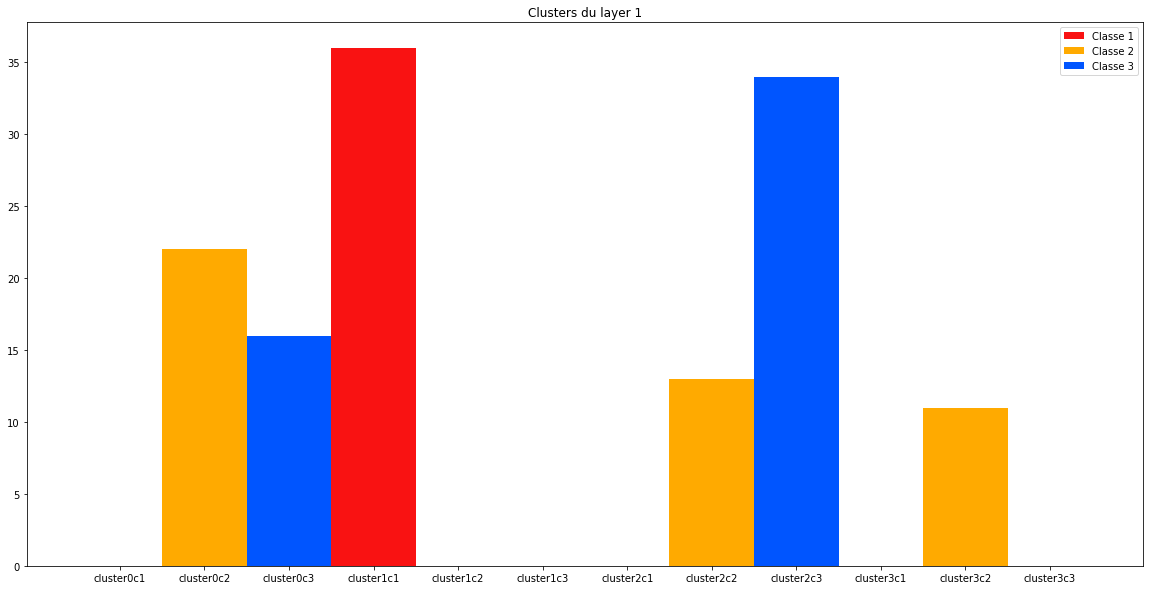

In [23]:
layer1 = pd.read_csv(destination+"/iris_8_10_8_/iris_clusters_layer1.csv")
print("layer1:\n",layer1)
graphCluster(layer1,'Clusters du layer 1')

layer1:
    Layer  Class  Count  Cluster
0      2      1     36        1
1      2      2     11        0
2      2      2     12        2
3      2      2     23        3
4      2      3     37        2
5      2      3     13        3


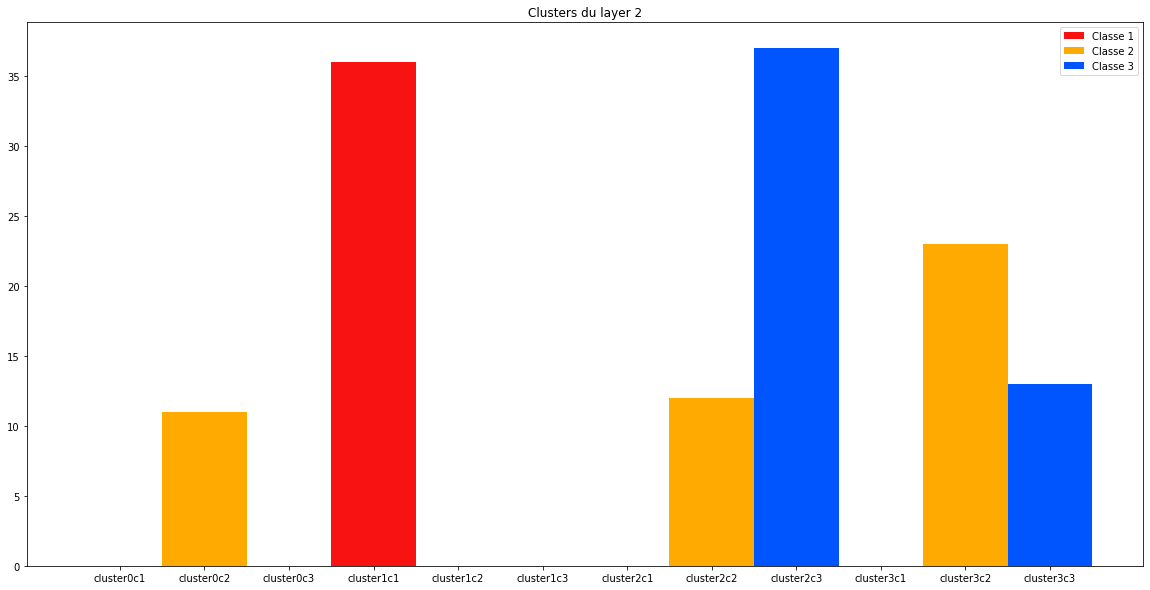

In [24]:
layer2 = pd.read_csv(destination+"/iris_8_10_8_/iris_clusters_layer2.csv")
print("layer1:\n",layer2)
graphCluster(layer2,'Clusters du layer 2')

layer1:
    Layer  Class  Count  Cluster
0      3      1     36        1
1      3      2     19        0
2      3      2     16        2
3      3      2     11        3
4      3      3      3        0
5      3      3     47        2


0

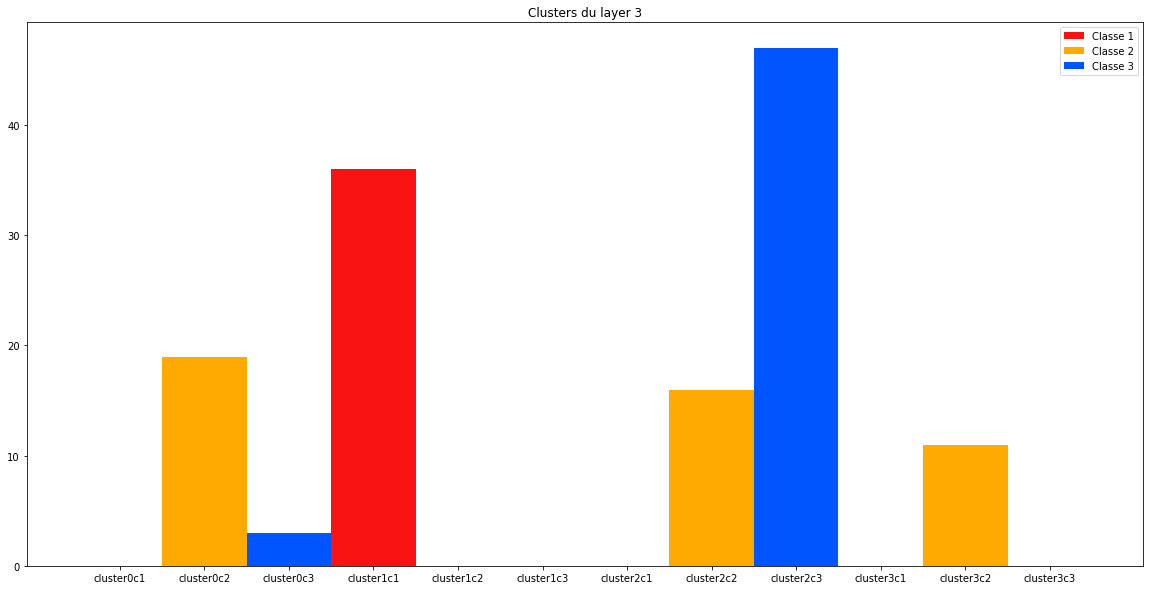

In [25]:
layer3 = pd.read_csv(destination+"/iris_8_10_8_/iris_clusters_layer3.csv")
print("layer1:\n",layer3)
graphCluster(layer3,'Clusters du layer 3')
os.system ('rm ./KmeansI/iris_8_10_8_/iris_clusters*')

## MNIST Dataset

In [26]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
from numpy import load
np.set_printoptions(linewidth=500)
data = load('mnist.npz')
lst = data.files
print(lst)

X_class0_1 = []
X_class2 = []
y_class0_1 = []
y_class2 = []


for i in range(int(len(data[lst[1]])/50)):
    if data[lst[2]][i] == 0:
        X_class0_1.append(data[lst[1]][i])
        y_class0_1.append(data[lst[2]][i])
    if data[lst[2]][i] == 1:
        X_class0_1.append(data[lst[1]][i])
        y_class0_1.append(data[lst[2]][i])
    if data[lst[2]][i] == 2:
        X_class2.append(data[lst[1]][i])
        y_class2.append(data[lst[2]][i])

['x_test', 'x_train', 'y_train', 'y_test']


In [27]:
(X_train,y_train) = (X_class0_1,y_class0_1)
(X_test,y_test) = (X_class2,y_class2)

X_train_sample=X_train[0:100]
y_train_sample=y_train[0:100]
print(len(X_train_sample))
print(len(y_train_sample))
X_train=X_train_sample
y_train=y_train_sample
X_train = np.reshape(X_train, (784, 100)).T
X_train = X_train.astype('float32')

X_test_sample=X_test[0:100]
y_test_sample=y_test[0:100]
print(len(X_test_sample))
print(len(y_test_sample))
X_test=X_test_sample
y_test=y_test_sample
X_test = np.reshape(X_test, (784, 100)).T
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print(y_train)
X_01=[]
y_01=[]
nb_X=0
# for i in range(X_train.shape[0]):
#     if (y_train[i]==0 or y_train[i]==1):
        
#         nb_X+=1
#         X_01.append(X_train[i])
#         y_01.append(y_train[i])

       

# train_X=np.asarray(X_01)

# train_y=y_01
nbClusters = 10
encoder = LabelEncoder()
y_train=encoder.fit_transform(y_train)
print(y_train)

100
100
100
100
[0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
[0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1]


In [28]:
input_dim = 784

model = Sequential()
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(512, input_dim = input_dim , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X_train, y_train, epochs = 40, batch_size = 32)


X_good,y_good=get_goodXy (X_train, y_train)


# Récupération des valeurs de tous les layers sauf le dernier
result_layers=get_result_layers(model,X_good)
print(len(y_class0_1))

Epoch 1/40
100/100 [==============================] - 2s 20ms/step - loss: 0.6981 - acc: 0.5600
Epoch 2/40
100/100 [==============================] - 0s 5ms/step - loss: 0.6794 - acc: 0.5600
Epoch 3/40
100/100 [==============================] - 0s 3ms/step - loss: 0.6248 - acc: 0.6700
Epoch 4/40
100/100 [==============================] - 0s 4ms/step - loss: 0.6234 - acc: 0.6700
Epoch 5/40
100/100 [==============================] - 0s 5ms/step - loss: 0.5786 - acc: 0.7300
Epoch 6/40
100/100 [==============================] - 0s 4ms/step - loss: 0.4895 - acc: 0.7400
Epoch 7/40
100/100 [==============================] - 0s 3ms/step - loss: 0.4404 - acc: 0.7900
Epoch 8/40
100/100 [==============================] - 0s 3ms/step - loss: 0.3601 - acc: 0.8300
Epoch 9/40
100/100 [==============================] - 0s 3ms/step - loss: 0.5741 - acc: 0.7500
Epoch 10/40
100/100 [==============================] - 0s 4ms/step - loss: 0.4238 - acc: 0.8100
Epoch 11/40
100/100 [===========================

In [29]:
# Sauvegarde du fichier
# structure :
# 0/1 = valeur de la classe
# chaque valeur de layer est entourée par une étoile *
save_result_layers("mnist_512_512_512_512_512_tmp",X_good,y_good,result_layers)
# tri du fichier
os.system ('sort mnist_512_512_512_512_512_tmp > mnist_512_512_512_512_512_.csv')
# effacer le fichier intermédiaire
os.system ('rm -f mnist_512_512_512_512_512_tmp')

-1

In [33]:
filename="mnist_512_512_512_512_512_.csv"    
destination="./KmeansM"
get_directory_layers_from_csv(filename,destination)
os.system ('rm -f ./KmeansM/mnist_512_512_512_512_512_/mnist_')

['mnist', '512', '512', '512', '512', '512', '.csv']
mnist_512_512_512_512_512_
./KmeansM/mnist_512_512_512_512_512_/mnist_l1_512.csv
./KmeansM/mnist_512_512_512_512_512_/mnist_l2_512.csv
./KmeansM/mnist_512_512_512_512_512_/mnist_l3_512.csv
./KmeansM/mnist_512_512_512_512_512_/mnist_l4_512.csv
./KmeansM/mnist_512_512_512_512_512_/mnist_l5_512.csv


-1

In [35]:
result_layers=get_result_layers(model,X_test)
save_result_layers("mnisttest_512_512_512_512_512_tmp",X_test,y_test,result_layers)

os.system ('sort mnisttest_512_512_512_512_512_tmp > mnisttest_512_512_512_512_512_.csv')
# effacer le fichier intermédiaire
os.system ('rm -f mnisttest_512_512_512_512_512_tmp')

-1

In [36]:
filename="mnisttest_512_512_512_512_512_.csv"    
destination="./KmeansM"
get_directory_layers_from_csv(filename,destination)
os.system ('rm -f ./KmeansM/mnisttest_512_512_512_512_512_/mnisttest_')

['mnisttest', '512', '512', '512', '512', '512', '.csv']
mnisttest_512_512_512_512_512_
./KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l1_512.csv
./KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l2_512.csv
./KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l3_512.csv
./KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l4_512.csv
./KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l5_512.csv


-1

In [39]:
TEST_EXIST=False
print("Init test =",TEST_EXIST)
list_files_to_learn,list_files_to_test,TEST_EXIST = search_files("./KmeansM")
print(list_files_to_learn)
print(list_files_to_test)
objects_cluster_perlayer,objectstest_cluster_perlayer= clustering(list_files_to_learn, list_files_to_test,4,TEST_EXIST)
print(objects_cluster_perlayer)
creation_json(objects_cluster_perlayer,objectstest_cluster_perlayer,'./affichageWeb/mnist.json',TEST_EXIST)

Init test = False
Initialisation part: reading the files in the directory ./KmeansM
test = True
['./KmeansM/mnist_512_512_512_512_512_/mnist_l1_512.csv', './KmeansM/mnist_512_512_512_512_512_/mnist_l2_512.csv', './KmeansM/mnist_512_512_512_512_512_/mnist_l3_512.csv', './KmeansM/mnist_512_512_512_512_512_/mnist_l4_512.csv', './KmeansM/mnist_512_512_512_512_512_/mnist_l5_512.csv']
['./KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l1_512.csv', './KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l2_512.csv', './KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l3_512.csv', './KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l4_512.csv', './KmeansM/mnisttest_512_512_512_512_512_/mnisttest_l5_512.csv']
Compute the clustering for the original data
test = True
Layer 1
Clusters de la classe # 0.0 : [3 2 0 1]
Clusters de la classe # 1.0 : [3 2 1 0]
Layer 2
Clusters de la classe # 0.0 : [1 0]
Clusters de la classe # 1.0 : [3 2 0 1]
Layer 3
Clusters de la classe # 0.0 : [3 1]
Clusters de la clas

In [ ]:
# clustersC3l1,clustersC1l1,clustersC2l1=clusterizeLayer('./mnist_512_512_512_512_512_/mnist_l1_512.csv',10,dfClass2)
# clustersC3l2,clustersC1l2,clustersC2l2=clusterizeLayer('./mnist_512_512_512_512_512_/mnist_l2_512.csv',10,dfClass2)
# clustersC3l3,clustersC1l3,clustersC2l3=clusterizeLayer('./mnist_512_512_512_512_512_/mnist_l3_512.csv',10,dfClass2)
# clustersC3l4,clustersC1l4,clustersC2l4=clusterizeLayer('./mnist_512_512_512_512_512_/mnist_l4_512.csv',10,dfClass2)
# clustersC3l5,clustersC1l5,clustersC2l5=clusterizeLayer('./mnist_512_512_512_512_512_/mnist_l5_512.csv',10,dfClass2)

# C1l1=get_result_cluster(clustersC1l1,1,1)
# C1l2=get_result_cluster(clustersC1l2,2,1)
# C1l3=get_result_cluster(clustersC1l3,3,1)
# C1l4=get_result_cluster(clustersC1l4,4,1)
# C1l5=get_result_cluster(clustersC1l5,5,1)

# C2l1=get_result_cluster(clustersC2l1,1,2)
# C2l2=get_result_cluster(clustersC2l2,2,2)
# C2l3=get_result_cluster(clustersC2l3,3,2)
# C2l4=get_result_cluster(clustersC2l2,4,2)
# C2l5=get_result_cluster(clustersC2l3,5,2)

# C3l1=get_result_cluster(clustersC3l1,1,3)
# C3l2=get_result_cluster(clustersC3l2,2,3)
# C3l3=get_result_cluster(clustersC3l3,3,3)
# C3l4=get_result_cluster(clustersC3l2,4,3)
# C3l5=get_result_cluster(clustersC3l3,5,3)

# save_result_cluster("./mnist_512_512_512_512_512_/mnist_clusters_layer1.csv",[C1l1,C2l1,C3l1])
# save_result_cluster("./mnist_512_512_512_512_512_/mnist_clusters_layer2.csv",[C1l2,C2l2,C3l2])
# save_result_cluster("./mnist_512_512_512_512_512_/mnist_clusters_layer3.csv",[C1l3,C2l3,C3l3])
# save_result_cluster("./mnist_512_512_512_512_512_/mnist_clusters_layer4.csv",[C1l4,C2l4,C3l4])
# save_result_cluster("./mnist_512_512_512_512_512_/mnist_clusters_layer5.csv",[C1l5,C2l5,C3l5])

# merge_csv("./mnist_512_512_512_512_512_/mnist_clusters_layers.csv",["./mnist_512_512_512_512_512_/mnist_clusters_layer1.csv","./mnist_512_512_512_512_512_/mnist_clusters_layer2.csv","./mnist_512_512_512_512_512_/mnist_clusters_layer3.csv","./mnist_512_512_512_512_512_/mnist_clusters_layer4.csv","./mnist_512_512_512_512_512_/mnist_clusters_layer5.csv"] )
# convert_to_sankey('./affichageWeb/sankeyMnist.csv',"./mnist_512_512_512_512_512_/mnist_clusters_layers.csv")